## N 维数组
N 维数组是机器学习和神经网络的主要数据结构。

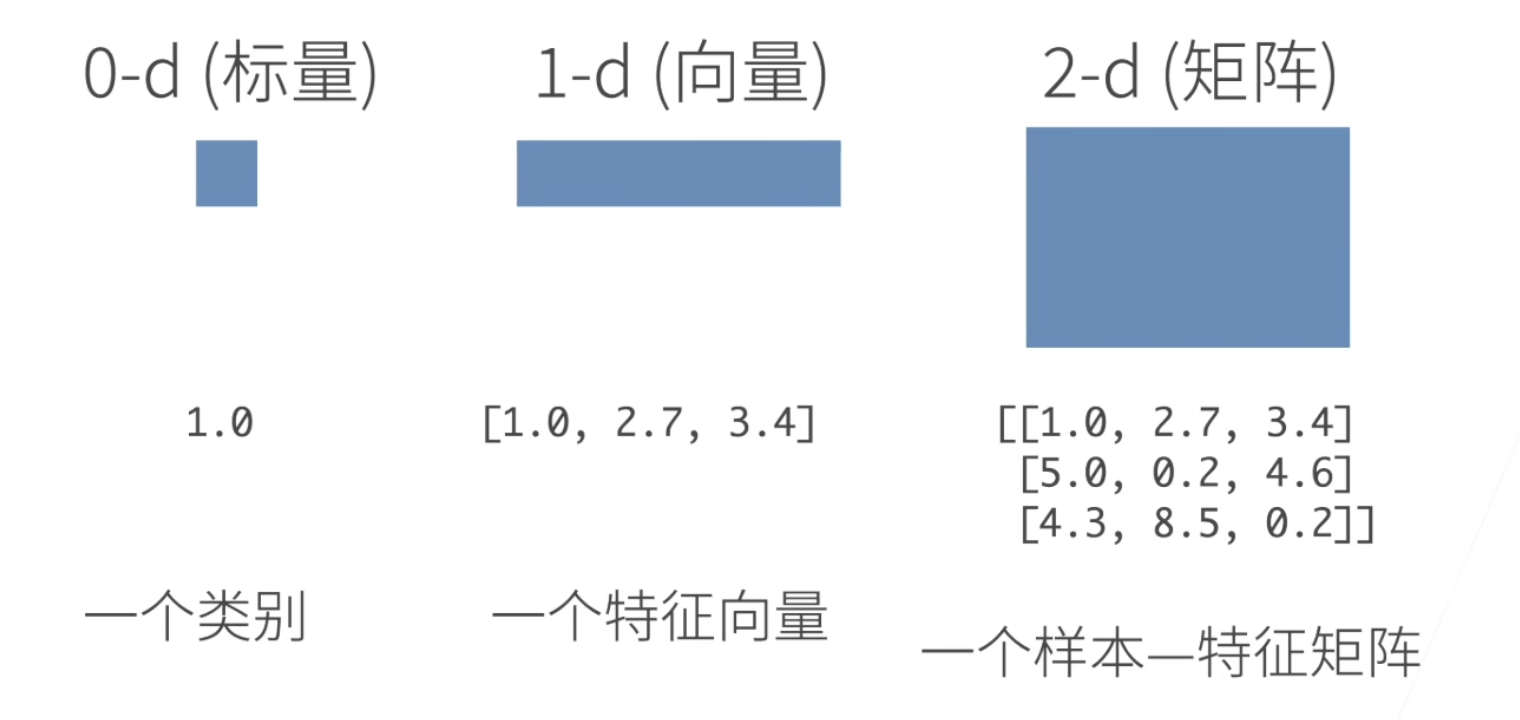

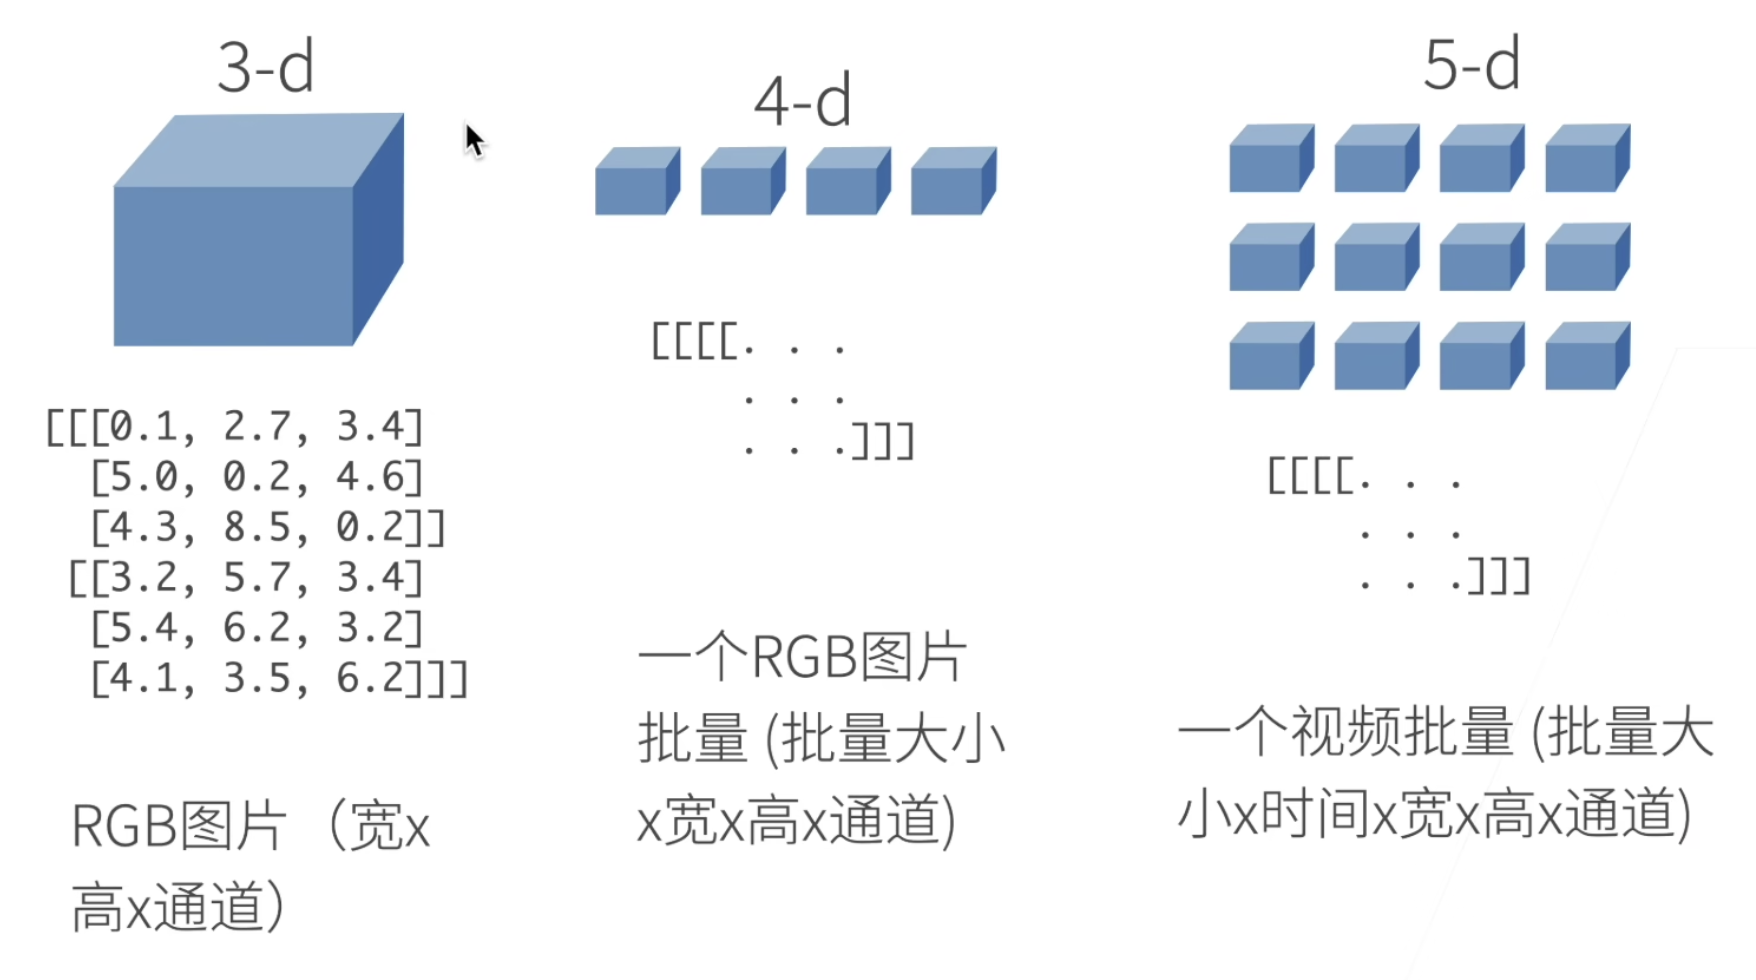

In [2]:
import torch

## 张量
张量表示一个数字组成的数组，这个数组可能有很多维度。

In [5]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [6]:
x.shape

torch.Size([12])

In [9]:
x.numel()  # 元素个数

12

In [10]:
x = x.reshape(3, 4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

## 创建数组
需要提供三个信息：
1. 形状：如 3 * 4 矩阵
2. 每个元素的数据类型：如 32 位浮点数
3. 每个元素的值，如全是 0，或随机数

In [13]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [14]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4]])

## 访问数组
一个元素：[1,2]  
一行：[1,:]  
一列：[:,1]  
子区域：[1:3,1:] [1,3)  
子区域：[::3,::2]  

## 按元素运算
常见的标准算术运算符（+、-、*、/、`**`）都可以被升级为按元素计算。  

In [23]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

指数也可以按元素作

In [24]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

## 张量连接
可以把多个张量连接在一起

In [25]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

通过逻辑运算符构建二元张量

In [28]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

## 广播机制
**前提：** 维度相同，如都是2个维度（矩阵）  
**广播方式：** 某个维度两个张量数量不同时，数量小者复制自身到和大者在此维度数量相同  

In [29]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [30]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 其他运算

#### 求和
对张量中所有元素进行求和会产生一个只有一个元素的**张量**

In [27]:
x.sum()

tensor(15.)

## 内存原地操作

In [31]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [34]:
# 原地操作实现方案
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 4824782288
id(Z): 4824782288


如果后续计算中没有重复使用X，可以使用 `X[:] = X + Y` 或 `X += Y` 来减少操作的内存开销

## numpy

转换为numpy张量

In [36]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

## 标量
将大小为1的张量转换为 python 标量

In [37]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)